In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Set path for dataset
path = 'dataset/'

df_all = pd.DataFrame()
df_year = pd.DataFrame()

# Read csv files and concatenate into single data frame df_all
for i in range (2008,2020):
    df_year=pd.read_csv(path+'match_details_'+str(i)+'.csv')
    df_all= df_all.append(df_year)

    
df_all[['win_runs','win_wickets']] = df_all[['win_runs','win_wickets']].fillna(0)    

In [3]:
df_all.head(2)  

,url,match_id,team_1,team_2,win_runs,win_wickets,winner,match_drawn,match_abandoned,no_result,toss_winner,winner_choice,series,pom,match_number,city,date,day_night
0,https://www.espncricinfo.com/series/8048/score...,336040,Chennai Super Kings,Rajasthan Royals,NaN,3.0,Rajasthan Royals,NaN,NaN,NaN,Rajasthan Royals,Field,Indian Premier League 2008,Yusuf Pathan,Final,Mumbai,Jun 1 2008,N
1,https://www.espncricinfo.com/series/8048/score...,335982,Kolkata Knight Riders,Royal Challengers Bangalore,140.0,NaN,Kolkata Knight Riders,NaN,NaN,NaN,Royal Challengers Bangalore,Field,Indian Premier League 2008,Brendon McCullum,1,Bengaluru,Apr 18 2008,N


In [4]:
df_all.tail(2)  

,url,match_id,team_1,team_2,win_runs,win_wickets,winner,match_drawn,match_abandoned,no_result,toss_winner,winner_choice,series,pom,match_number,city,date,day_night
56,https://www.espncricinfo.com/series/8048/score...,1181766,Sunrisers Hyderabad,Delhi Capitals,NaN,2.0,Delhi Capitals,NaN,NaN,NaN,Delhi Capitals,Field,Indian Premier League 2019,Rishabh Pant,Eliminator,Visakhapatnam,May 8 2019,N
57,https://www.espncricinfo.com/series/8048/score...,1181767,Delhi Capitals,Chennai Super Kings,NaN,6.0,Chennai Super Kings,NaN,NaN,NaN,Chennai Super Kings,Field,Indian Premier League 2019,Faf du Plessis,Qualifier,Visakhapatnam,May 10 2019,N


In [5]:
df_all.to_csv(path+'match_details_all.csv')

In [6]:
# Let us get some basic stats #
print("Number of matches played so far : ", df_all.shape[0])


Number of matches played so far :  732


In [7]:
#Extract season from Series
df_all['season']=df_all['series'].str[-4:]

In [8]:
print("Number of seasons : ", len(df_all.season.unique()))

Number of seasons :  12


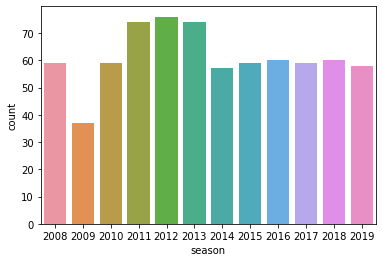

In [9]:
sns.countplot(x='season', data=df_all)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

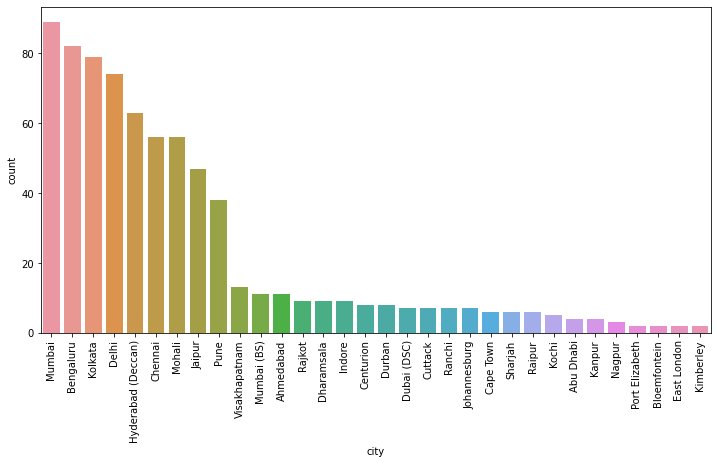

In [10]:
# Number of matches hosted by city 
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=df_all,order=df_all['city'].value_counts().index)
plt.xticks(rotation='vertical')


In [11]:
temp_df = pd.melt(df_all, id_vars=['match_id','season'], value_vars=['team_1', 'team_2'])

In [12]:
temp_df

,match_id,season,variable,value
0,336040,2008,team_1,Chennai Super Kings
1,335982,2008,team_1,Kolkata Knight Riders
2,335983,2008,team_1,Chennai Super Kings
3,335984,2008,team_1,Rajasthan Royals
4,335986,2008,team_1,Deccan Chargers
...,...,...,...,...
1459,1178430,2019,team_2,Kings XI Punjab
1460,1178431,2019,team_2,Mumbai Indians
1461,1181764,2019,team_2,Mumbai Indians
1462,1181766,2019,team_2,Delhi Capitals


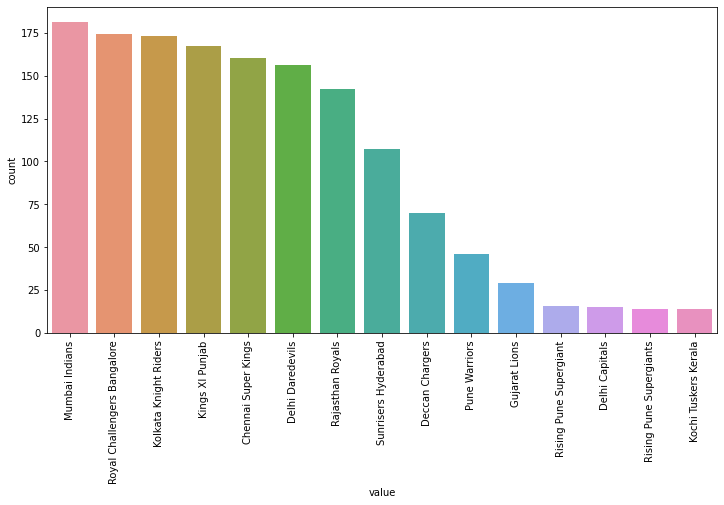

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df,order=temp_df['value'].value_counts().index )
plt.xticks(rotation='vertical')
plt.show()

Here we see some teams are repeated. 
This is because some of the franchises changed their team name between seasons.
For eg.
Pune Warriors - Rising Pune Supergiant(s)
Delhi Daredevils - Delhi Capitals

Lets merge these teams to same name (latest name used by team)

In [14]:
df_all['team_1'].unique()

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
team_map ={
    'Delhi Daredevils':'Delhi Capitals',
    'Delhi Capitals':'Delhi Capitals',
    'Pune Warriors':'Pune Warriors',
    'Rising Pune Supergiants':'Pune Warriors',
    'Rising Pune Supergiant':'Pune Warriors',
    'Mumbai Indians':'Mumbai Indians',
    'Chennai Super Kings':'Chennai Super Kings',
    'Kolkata Knight Riders':'Kolkata Knight Riders',
    'Rajasthan Royals':'Rajasthan Royals',
    'Deccan Chargers':'Deccan Chargers',
    'Kings XI Punjab':'Kings XI Punjab',
    'Royal Challengers Bangalore':'Royal Challengers Bangalore',
    'Kochi Tuskers Kerala':'Kochi Tuskers Kerala',
    'Sunrisers Hyderabad':'Sunrisers Hyderabad',
    'Gujarat Lions':'Gujarat Lions'
}

In [16]:
df_all.head(2)

,url,match_id,team_1,team_2,win_runs,win_wickets,winner,match_drawn,match_abandoned,no_result,toss_winner,winner_choice,series,pom,match_number,city,date,day_night,season
0,https://www.espncricinfo.com/series/8048/score...,336040,Chennai Super Kings,Rajasthan Royals,NaN,3.0,Rajasthan Royals,NaN,NaN,NaN,Rajasthan Royals,Field,Indian Premier League 2008,Yusuf Pathan,Final,Mumbai,Jun 1 2008,N,2008
1,https://www.espncricinfo.com/series/8048/score...,335982,Kolkata Knight Riders,Royal Challengers Bangalore,140.0,NaN,Kolkata Knight Riders,NaN,NaN,NaN,Royal Challengers Bangalore,Field,Indian Premier League 2008,Brendon McCullum,1,Bengaluru,Apr 18 2008,N,2008


In [17]:
df_all['team_1']=df_all['team_1'].map(team_map)
df_all['team_2']=df_all['team_2'].map(team_map)
df_all['winner']=df_all['winner'].map(team_map)
df_all['toss_winner']=df_all['toss_winner'].map(team_map)

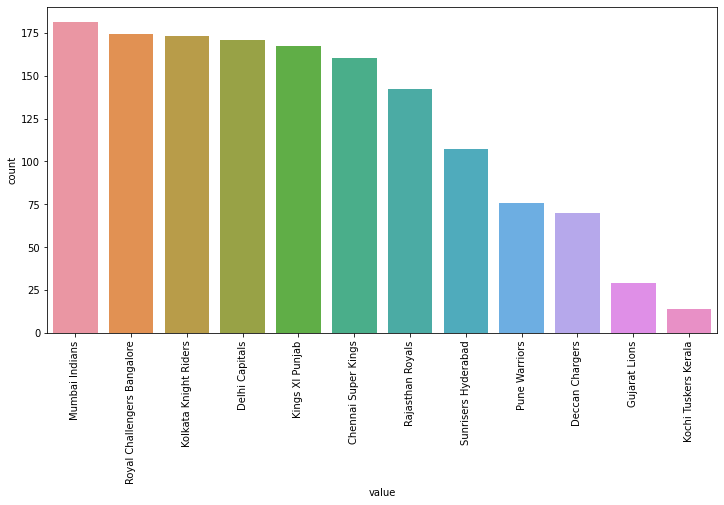

In [18]:
#Lets checl teamwise match count again

temp_df = pd.melt(df_all, id_vars=['match_id','season'], value_vars=['team_1', 'team_2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df,order=temp_df['value'].value_counts().index )
plt.xticks(rotation='vertical')
plt.show()

# Some of the teams seem to have played very less matches. 
Especially Sunriseres Hyderabad, Pune warriors, Deccan Chargers, Gujarat Lions and Kochi Tuskers Kerala
Lets check on it further.

In [23]:
temp_df


,match_id,season,variable,value
0,336040,2008,team_1,Chennai Super Kings
1,335982,2008,team_1,Kolkata Knight Riders
2,335983,2008,team_1,Chennai Super Kings
3,335984,2008,team_1,Rajasthan Royals
4,335986,2008,team_1,Deccan Chargers
...,...,...,...,...
1459,1178430,2019,team_2,Kings XI Punjab
1460,1178431,2019,team_2,Mumbai Indians
1461,1181764,2019,team_2,Mumbai Indians
1462,1181766,2019,team_2,Delhi Capitals


In [20]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_id  1464 non-null   int64 
 1   season    1464 non-null   object
 2   variable  1464 non-null   object
 3   value     1464 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.9+ KB


In [24]:
temp_df['season']=temp_df['season'].apply(pd.to_numeric) 

In [25]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_id  1464 non-null   int64 
 1   season    1464 non-null   int64 
 2   variable  1464 non-null   object
 3   value     1464 non-null   object
dtypes: int64(2), object(2)
memory usage: 45.9+ KB


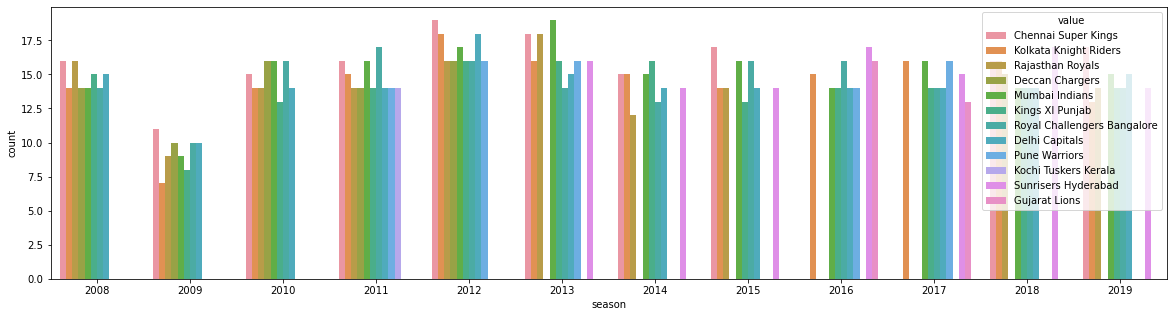

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x='season',hue='value',data=temp_df)

In above graph we can see some teams are missing in seasons.
temp_df[temp_df['value']=='Sunriseres Hyderabad']

In [37]:
temp_df[temp_df['value']=='Sunrisers Hyderabad']

,match_id,season,variable,value
308,598000,2013,team_1,Sunrisers Hyderabad
313,598048,2013,team_1,Sunrisers Hyderabad
325,598018,2013,team_1,Sunrisers Hyderabad
337,598030,2013,team_1,Sunrisers Hyderabad
339,598032,2013,team_1,Sunrisers Hyderabad
...,...,...,...,...
1421,1175371,2019,team_2,Sunrisers Hyderabad
1424,1178394,2019,team_2,Sunrisers Hyderabad
1435,1178405,2019,team_2,Sunrisers Hyderabad
1438,1178408,2019,team_2,Sunrisers Hyderabad


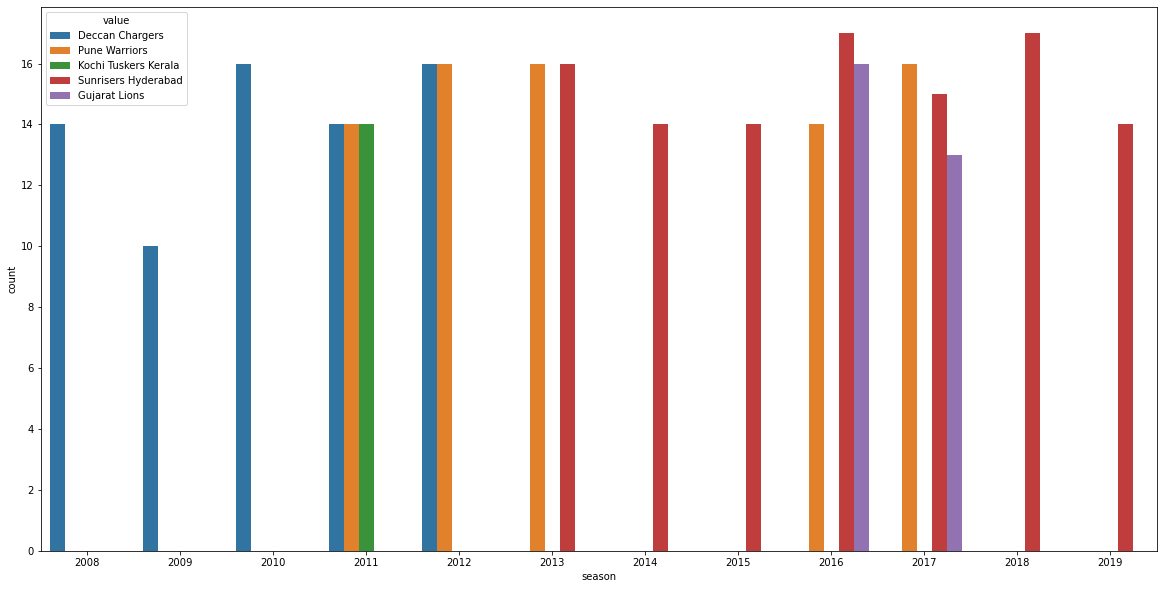

In [41]:
options=['Sunrisers Hyderabad','Pune Warriors', 'Deccan Chargers', 'Gujarat Lions', 'Kochi Tuskers Kerala']
plt.figure(figsize=(20,10))
sns.countplot(x='season',hue='value',data=temp_df[temp_df['value'].isin(options)])

# To Summarize :
Deccan Chargers played between     2008-2012

Pune Warriors played between       2011-2013,2016-2017

Kochi Tuskers Kerala played in     2011

Sunrisers Hyderabad played between 2013-2019

Gujarat Lions played between       2016-2017


Kochi being involved in 1 season explains lowest number of matches played.

# Lets now move on to Winning statistics

## Seasonwise Champions

In [43]:
winner_df = df_all.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
winner_df

,season,winner
0,2008,Chennai Super Kings
1,2009,Royal Challengers Bangalore
2,2010,Kolkata Knight Riders
3,2011,Deccan Chargers
4,2012,Chennai Super Kings
5,2013,Mumbai Indians
6,2014,Kings XI Punjab
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


## Toss decision

Text(0.5, 1.0, 'Toss decision percentage')

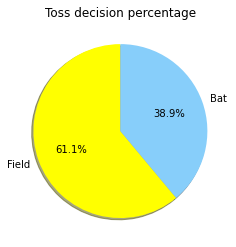

In [46]:
temp_series = df_all['winner_choice'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['yellow', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")


Most of the toss winning teams chose to Field first.
Lets break it down seasonwise

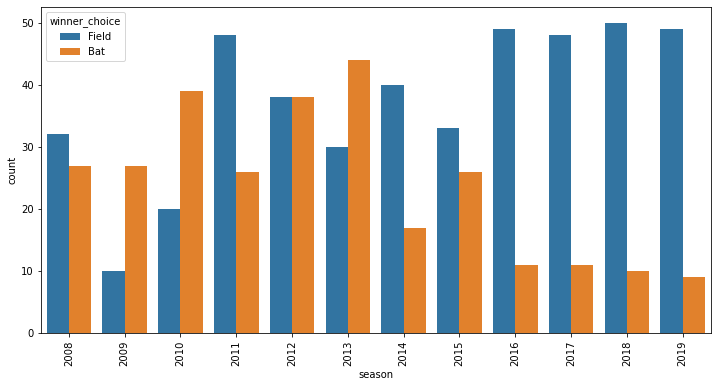

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='winner_choice', data=df_all)
plt.xticks(rotation='vertical')
plt.show()

We see teams leaning more towards Fielding first, in latest seasons.

Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.

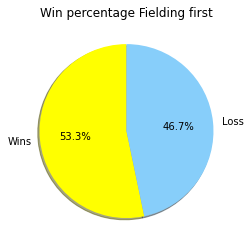

In [59]:
num_of_wins = (df_all['win_wickets']>0).sum()
num_of_loss = (df_all['win_wickets']==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['yellow', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage Fielding first")


Fielding first has slight advantage over Batting first

C:\Users\A188492\AI\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

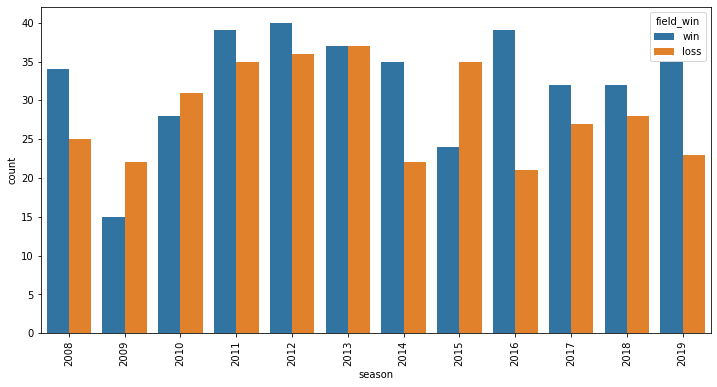

In [63]:
df_all["field_win"] = "win"
df_all["field_win"].loc[df_all['win_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=df_all)
plt.xticks(rotation='vertical')

C:\Users\A188492\AI\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

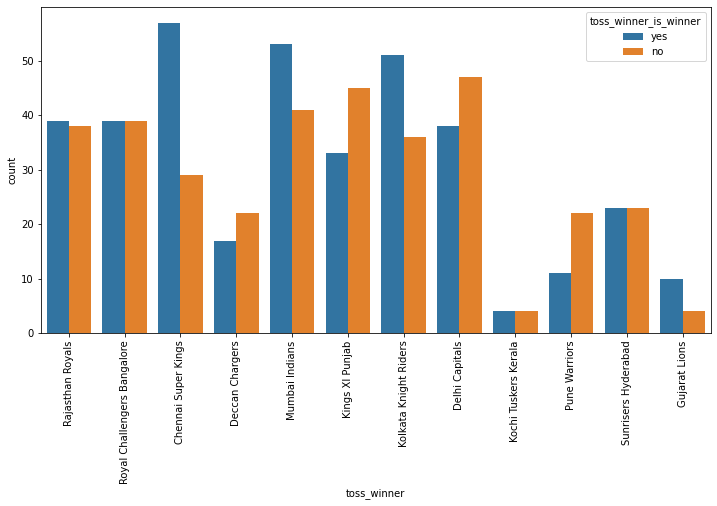

In [70]:
plt.figure(figsize=(12,6))
df_all['toss_winner_is_winner'] = 'no'
df_all['toss_winner_is_winner'].loc[df_all.toss_winner == df_all.winner] = 'yes'
sns.countplot(x='toss_winner', hue='toss_winner_is_winner',data=df_all)
plt.xticks(rotation='vertical')

Chennai Super Kings are more likely to win match, if they win toss

Pune Warriors are more likely to lose match, if they win toss

## Top players of the match:

Text(0.5, 1.0, 'Top Most Valued Player awardees')

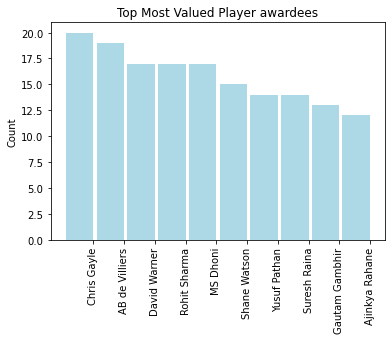

In [75]:
mvp_series = df_all['pom'].value_counts()[:10]
labels = np.array(mvp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(mvp_series), width=width, color='lightblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Most Valued Player awardees")
